# Cloth Targets

Investigate the signature of a sun-illuminated cloth bar target in the MWIR band.  The target is a free hanging cloth made with alternating strips/bars of white and black thick/heavy cloth.  The idea is to potentially use the same target in the visual and MWIR spectral bands.  In the visual and NIR bands the signature is mainly reflected sunlight, whereas in the MWIR band the signature is a composite of self-emission and reflected sunlight.  The sun heats up the black cloth more than the white cloth, leading to a temperature contrast in the different cloth bars.

This document investigates the signature obtainable from the cloth target when deployed in the sun.  At the time of writing the cloth spectral emissivity and reflectance were not known.  The effect of emissivity/reflectance variation has to be determined in the absence of any better information.

On one occasion the cloth target was deployed directly facing the sun, i.e., the angle between the target normal vector and the direction to the sun was relatively small.  On this occasion the temperature difference between the white and black bars was around 20 to 25 K.  The cloth responded to heat influx with a time constant of less than five to ten seconds. During this same occasion the wind was blowing lightly, but seemed to have a relatively small effect on the temperature contrast.

If the cloth is oriented differently (large angle between the cloth normal and direction to the sun) the temperature difference between the white and black bars will be smaller than the observed value reported above.  In the extreme case where the angle is 90 degrees, the contrast will be zero.  It is therefore reasonable to believe that the target contrast will be less than the measured 20 to 25 K.

The case investigated below is for an incidence angle of zero between the sun direction and cloth normal vector, i.e., the situation that was measured.  The spectral properties of the cloth is not known, so constant wideband emissivity and reflectance are assumed.

The total signature (expressed in radiance) is given by

\begin{equation}
L_t= 
\int \epsilon_{\lambda} \tau_{a\lambda} \tau_{o\lambda} L(T_{b}) d\lambda
+
2.17\times 10^{-5}\int \rho_{\lambda} \tau_{s\lambda} \tau_{a\lambda} \tau_{o\lambda}  L(T_{s}) d\lambda
+
L_p
\end{equation}
where
$\epsilon_{\lambda}$ is the cloth emissivity,
$\tau_{a\lambda}$ is the atmospheric transmittance between the cloth target and the sensor,
$\tau_{o\lambda}$ is the sensor filter transmittance, 
$T_{b}$ is the cloth temperature, 
$2.17\times 10^{-5}$ is the geometrical factor relating radiance on the sun's surface to unity-reflected radiance on the object surface,
$\rho_{\lambda} = 1 - \epsilon_{\lambda}$ is the cloth reflectance, 
$\tau_{s\lambda}$ is the transmittance between the sun and the cloth, 
$T_{s}$ is the sun's surface temperature, and 
$L_p$ is the atmospheric path radiance.


In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import os.path
from scipy.optimize import curve_fit
from scipy import interpolate

%matplotlib inline

# %reload_ext autoreload
# %autoreload 2

import pyradi.ryplot as ryplot
import pyradi.ryplanck as ryplanck
import pyradi.ryfiles as ryfiles
import pyradi.rymodtran as rymodtran
import pyradi.ryutils as ryutils

from IPython.display import HTML
from IPython.display import Image
from IPython.display import display
from IPython.display import FileLink, FileLinks

import matplotlib as mpl
mpl.rc("savefig", dpi=300)
mpl.rc('figure', figsize=(10,8))
# %config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_columns', 80)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 150)

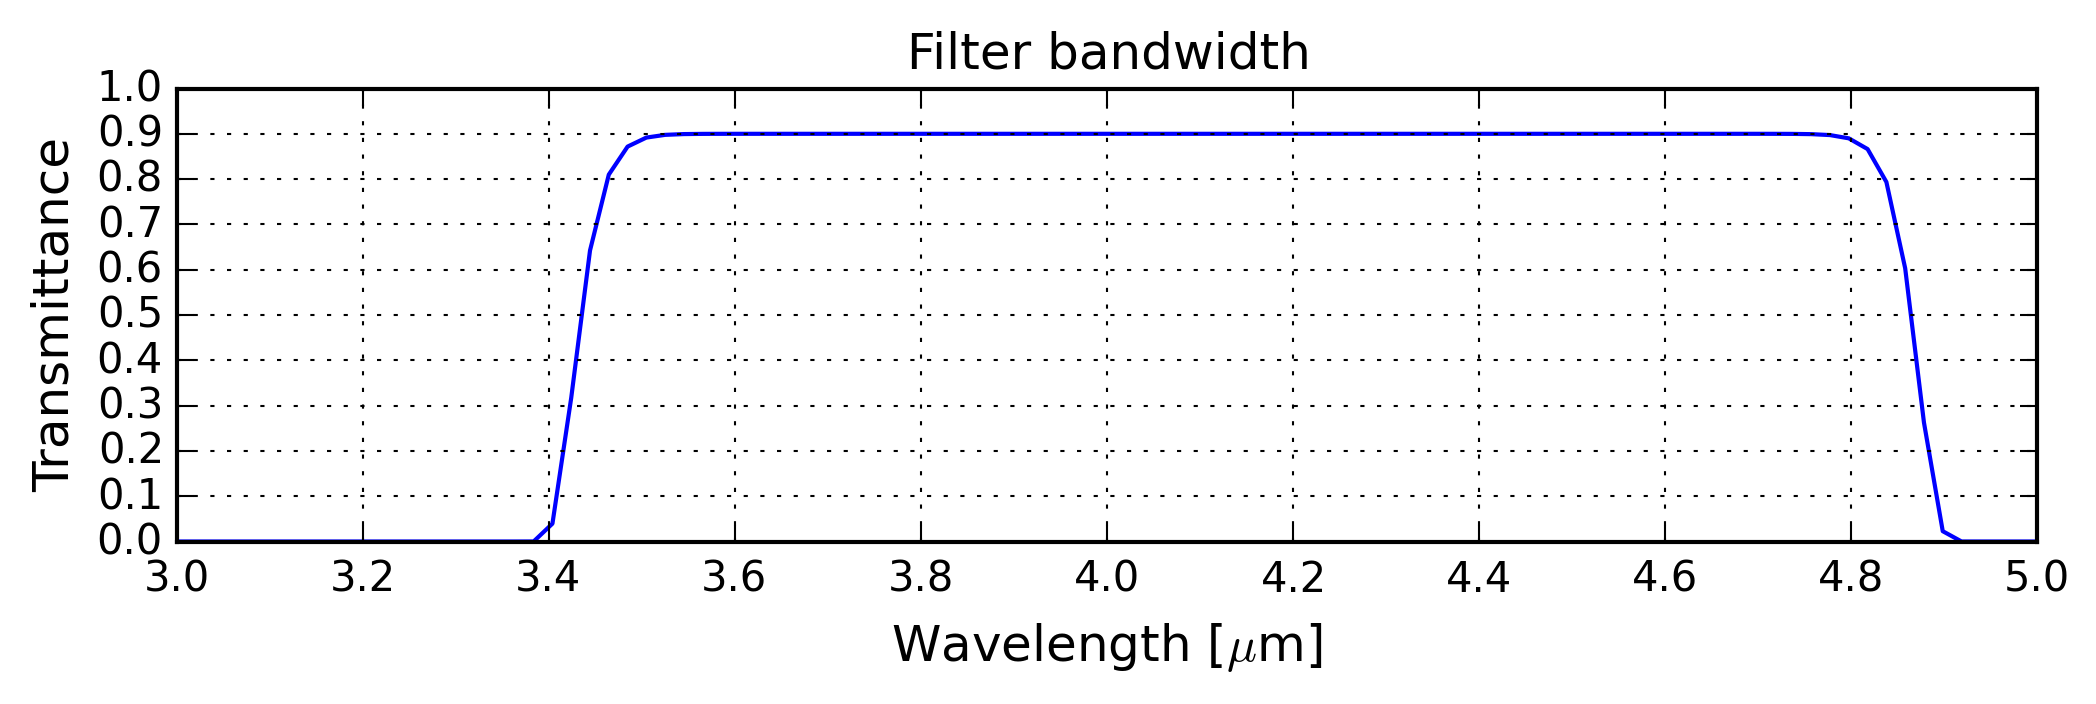

In [3]:
wl = np.linspace(3, 5, 100)
tauFilter = ryutils.sfilter(wl, 4.15, 1.45, exponent=40, taupass=0.9, taustop=0.0, filtertype = 'bandpass')
# tauFilter = ryutils.sfilter(wl, 4.25, 1.25, exponent=40, taupass=0.9, taustop=0.0, filtertype = 'bandpass')
q = ryplot.Plotter(2,1,1, figsize=(8,2))
q.plot(1,wl,tauFilter,'Filter bandwidth','Wavelength [$\mu$m]','Transmittance',pltaxis=[3,5, 0,1])


(100, 500)
(1, 500)
(100, 500)
(1, 500)
(100, 500)
(1, 500)
(100, 500)
(1, 500)


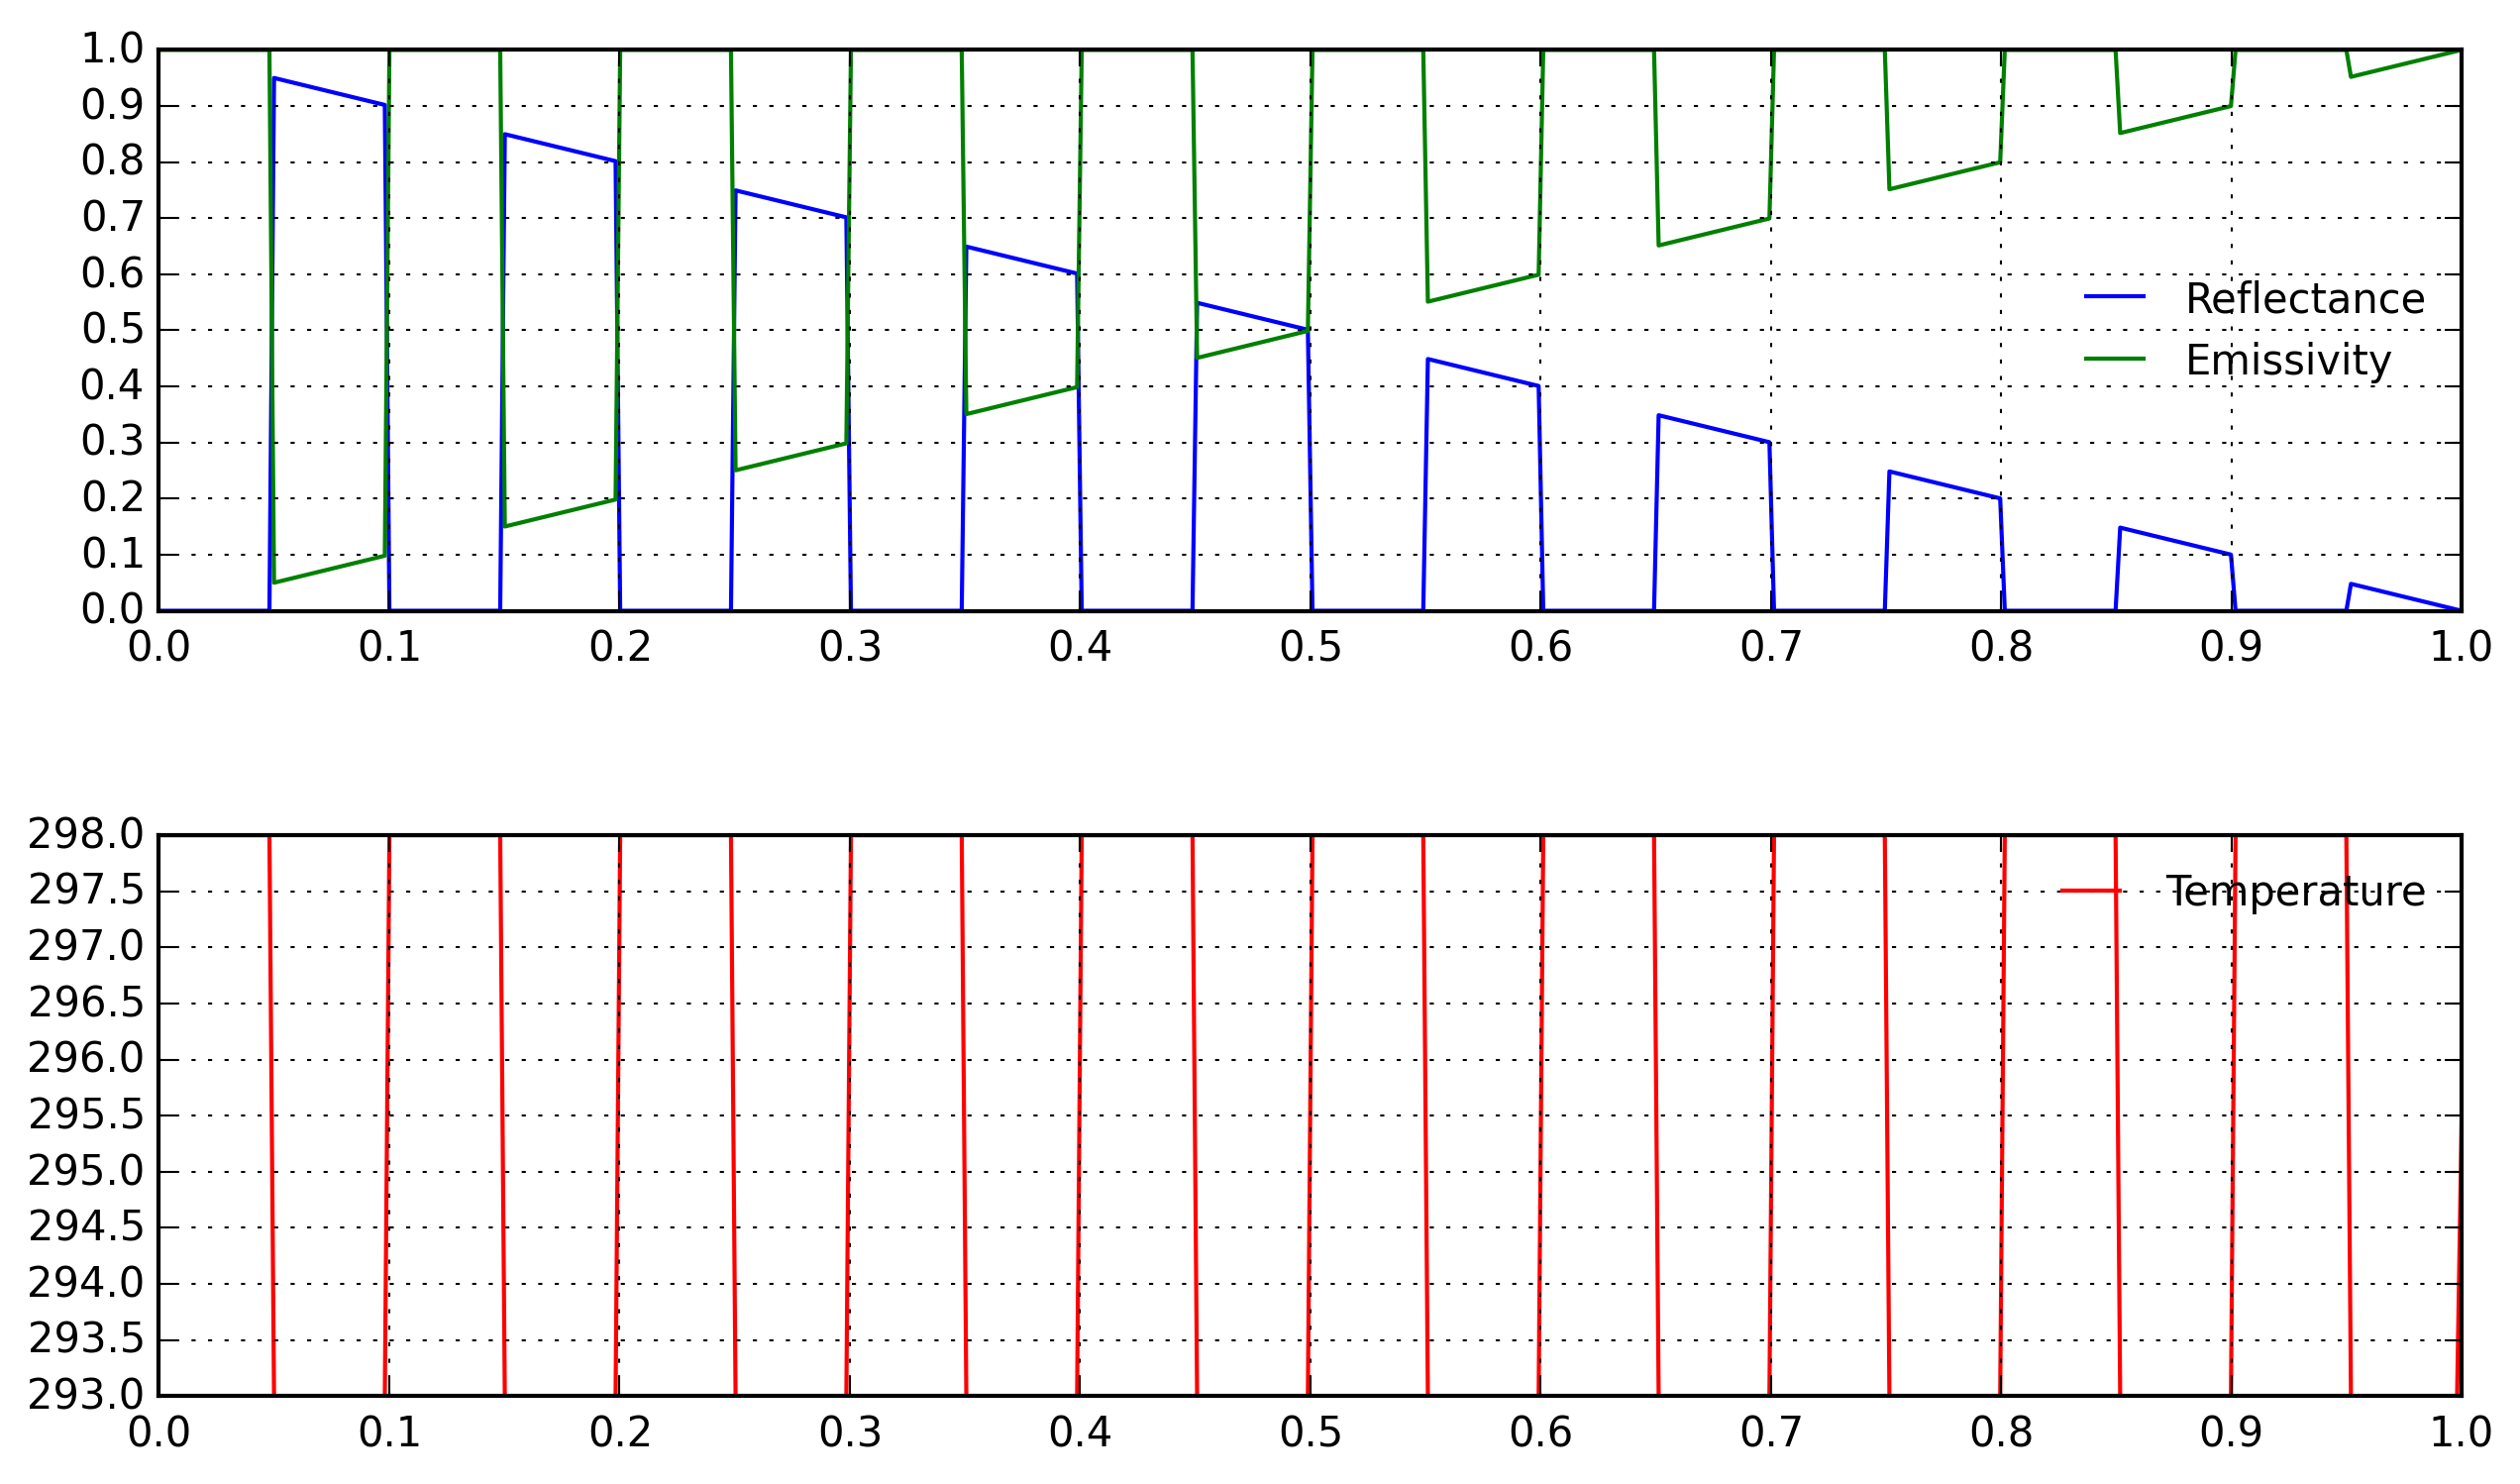

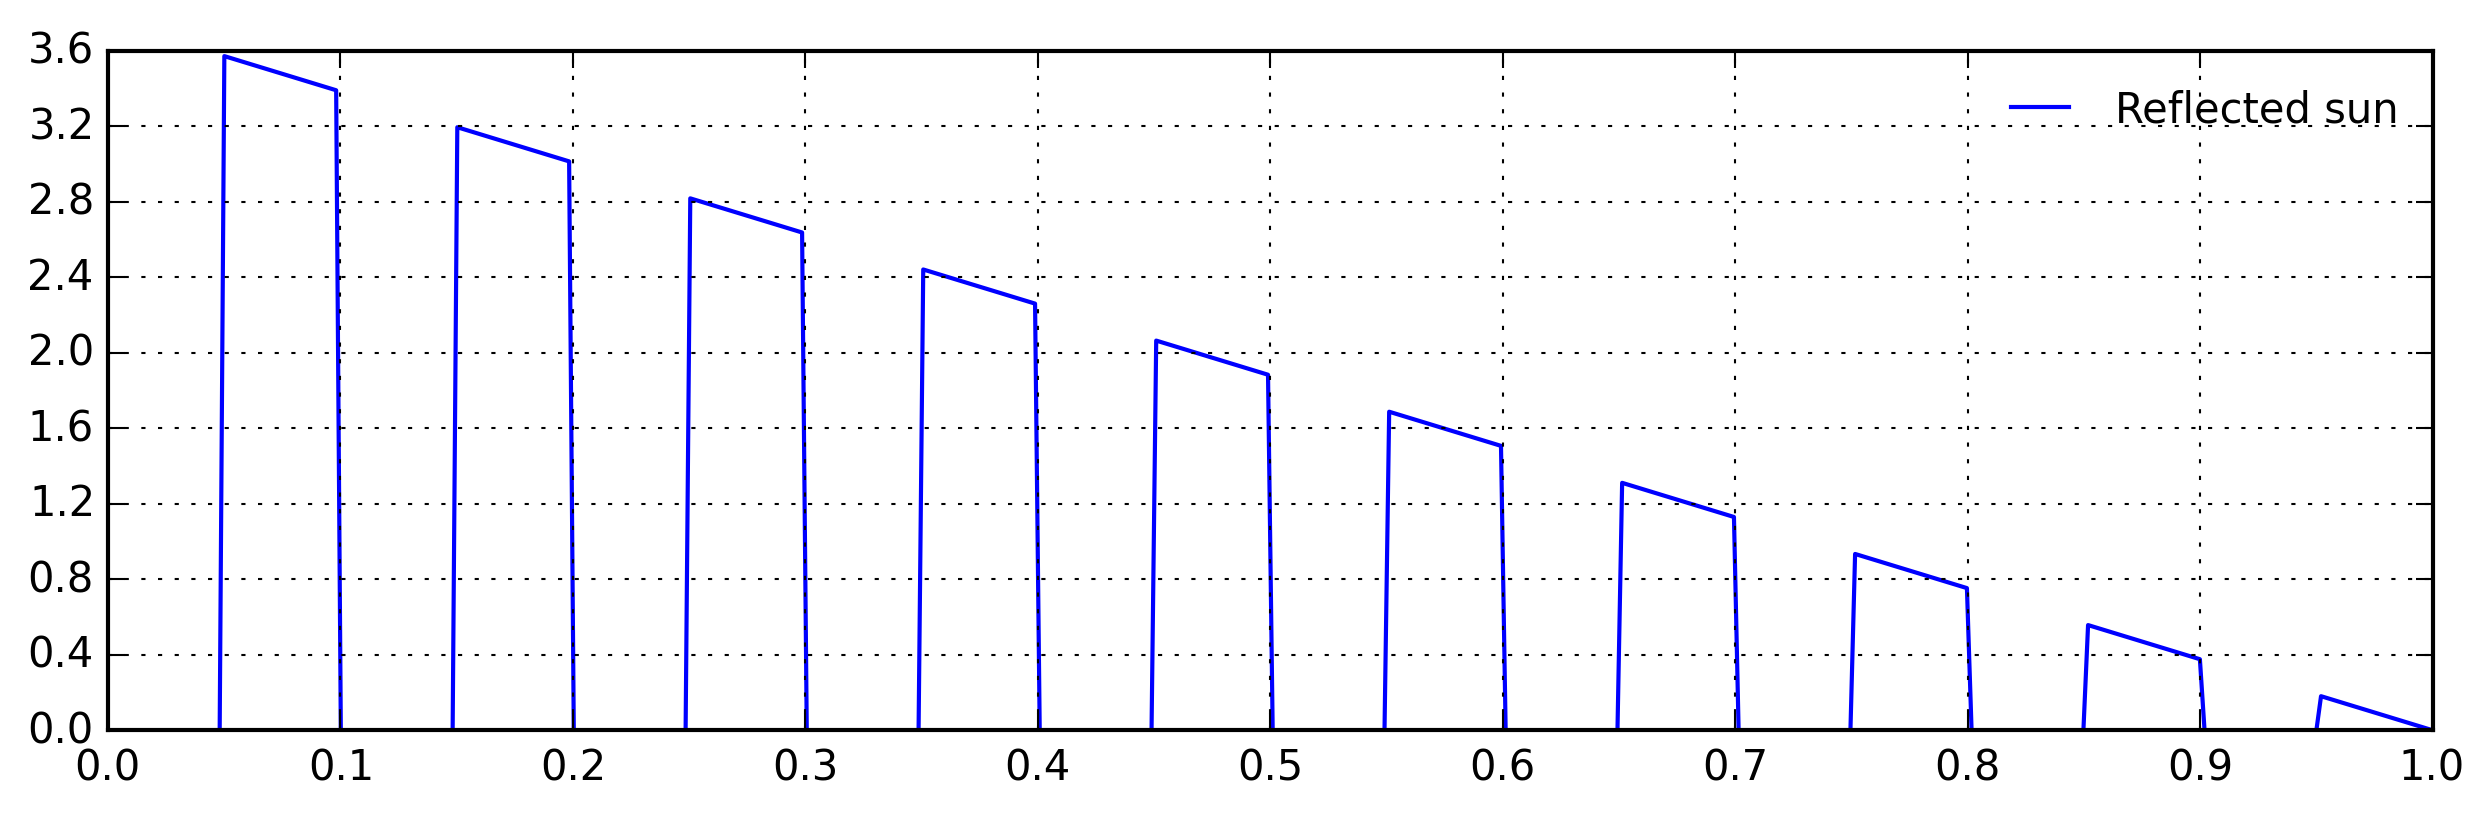

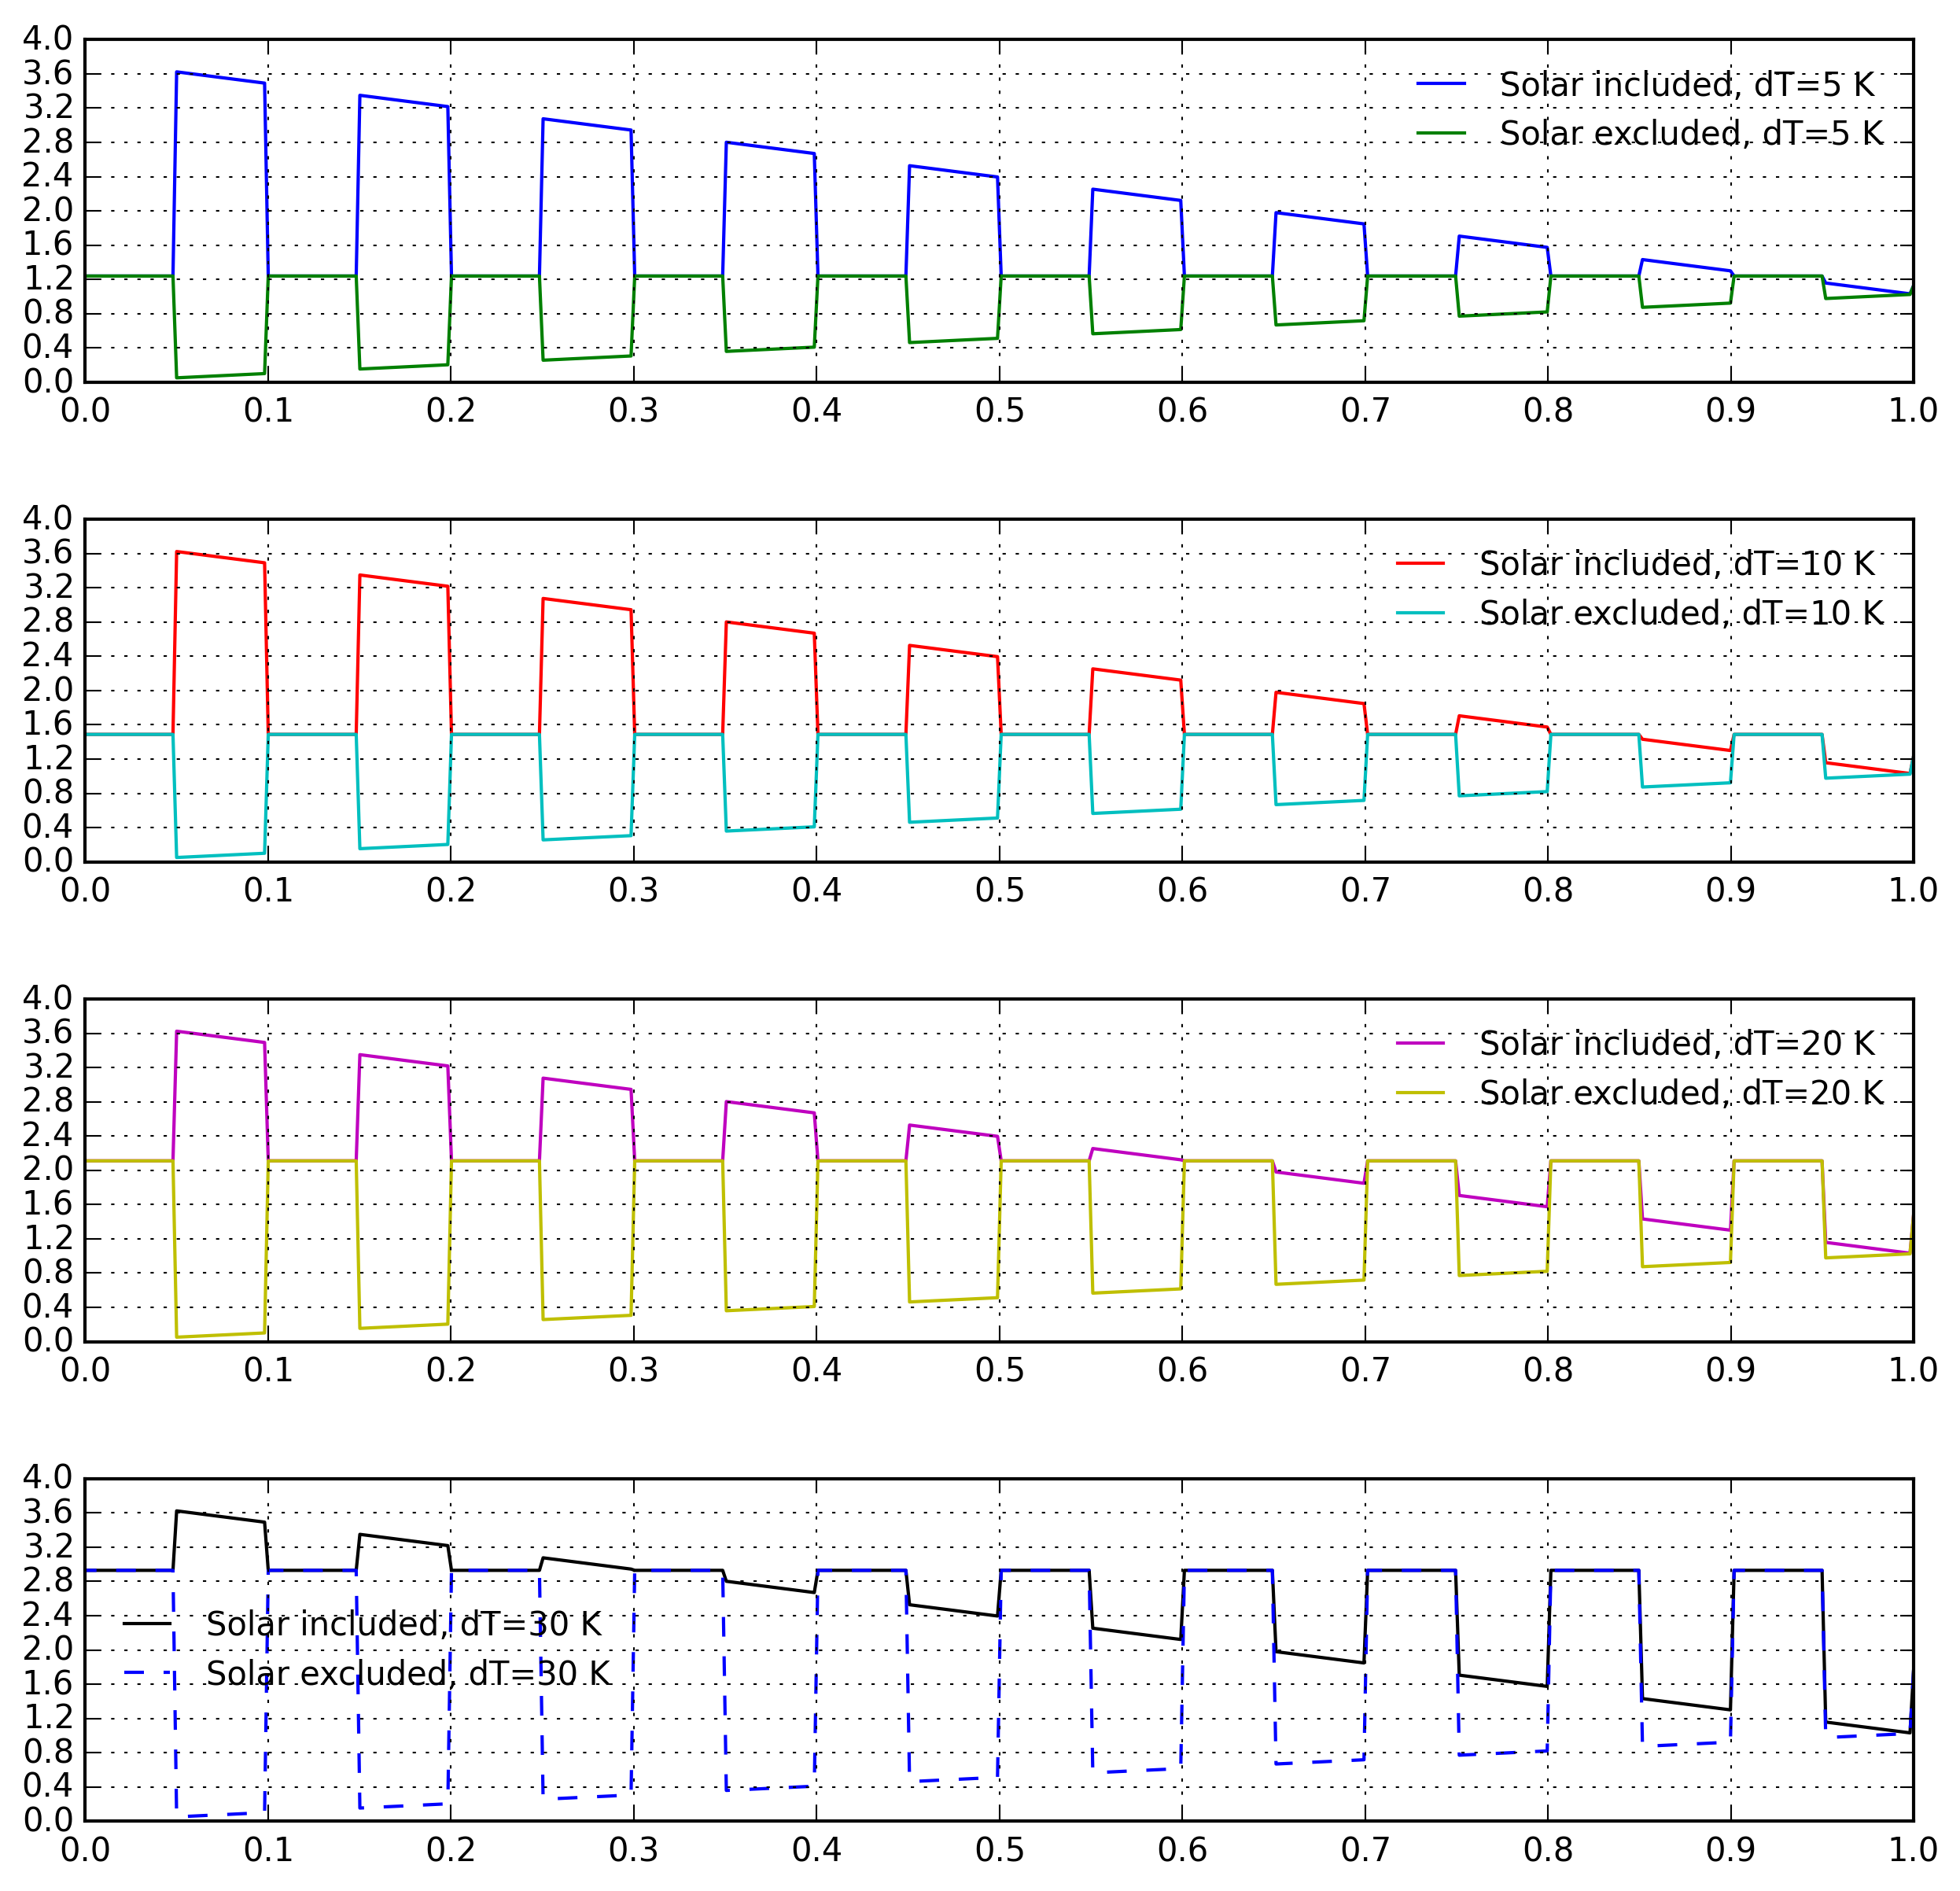

In [70]:
nx = 500
maxx = 50.
x = np.linspace(0,maxx,nx)
p = ryplot.Plotter(1,2,1, figsize=(10,6))
q = ryplot.Plotter(2,1,1, figsize=(10,3))
r = ryplot.Plotter(3,4,1, figsize=(10,10))

for i,tdelt in enumerate([5,10,20,30]):

    sq = (np.sign(np.sin(2 * np.pi * 100. * x.reshape(1,-1)))/2. + 0.5)
    refl =  x * sq / (maxx)  #(1 - x) * (1-sq) + x * sq
    tempr = 293. + tdelt * (1. - sq) 
    emis = 1. - refl
    xe = 1 - x / maxx

    lsun =  np.outer(refl,  tauFilter * 2.17e-5 * ryplanck.planck(wl,6000.,'el') / np.pi)
    lself =    emis * (tauFilter.reshape(-1,1) * ryplanck.planck(wl,tempr.reshape(-1,1),'el') / np.pi)

    lsunI = np.trapz(lsun,wl,axis=1)
    lselfI = np.trapz(lself.T,wl,axis=1)

    if not i:
        p.plot(1,xe,refl.reshape(-1,),label=['Reflectance'])
        p.plot(1,xe,emis.reshape(-1,),label=['Emissivity'])
        p.plot(2,xe,tempr.reshape(-1,),label=['Temperature'])

        q.plot(1,xe,lsunI,label=['Reflected sun'])
        
    r.plot(i+1,xe,lselfI+lsunI,label=['Solar included, dT={} K'.format(tdelt)])
    r.plot(i+1,xe,lselfI,label=['Solar excluded, dT={} K'.format(tdelt)])


In [1]:
14/0.05


280.0